# Задание, которое в форме для ДЗ - нужно совместить изображения ЛЭП в видимом спектре и инфракрасном.


---

Импорт необходимых библиотек

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import math

Функция для поворота изображения

In [ ]:
def rotation(image, angleInDegrees):
  h, w = image.shape[:2];
  img_c = (w / 2, h / 2);

  rot = cv.getRotationMatrix2D(img_c, angleInDegrees, 1);

  rad = math.radians(angleInDegrees);
  sin = math.sin(rad);
  cos = math.cos(rad);
  
  b_w = int(h * abs(sin) + w * abs(cos));
  b_h = int(h * abs(cos) + w * abs(sin));

  rot[0, 2] += ((b_w / 2) - img_c[0]);
  rot[1, 2] += ((b_h / 2) - img_c[1]);
  
  return cv.warpAffine(image, rot, (b_w, b_h), flags=cv.INTER_LINEAR,  borderValue=(0,0,0));

Чтение изображений

Исходные размеры RGB-изображения :  (864, 1152, 3)



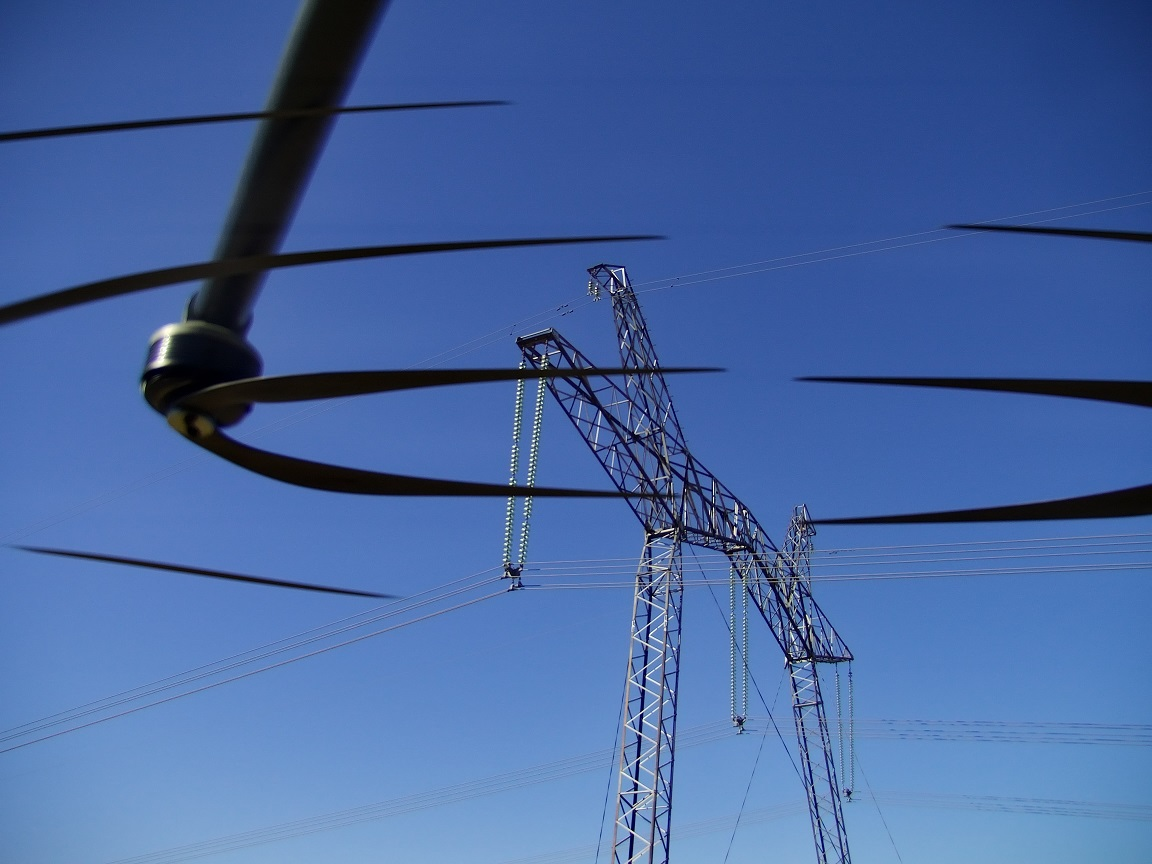


Исходные размеры ИК-изображения :  (480, 640, 3)



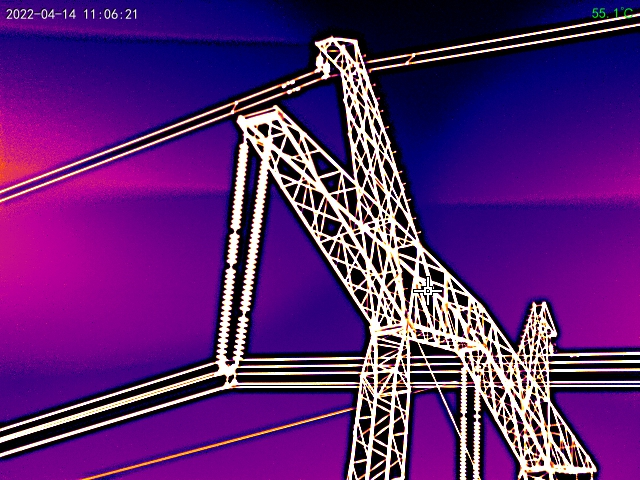

In [ ]:
ir_img = cv.imread("/content/010100AE.JPG");
rgb_img = cv.imread("/content/SING0137.JPG");

print('Исходные размеры RGB-изображения : ',rgb_img.shape);
print();
cv2_imshow(rgb_img);
print();
print('Исходные размеры ИК-изображения : ',ir_img.shape);
print();
cv2_imshow(ir_img);

Поворот ИК-изображения

In [ ]:
ir_img_rot = rotation (ir_img, 1.62);

#cv2_imshow(ir_img_rot);

Изменение размера ИК-изображения

In [ ]:
scale_percent = 92;
width = int(ir_img_rot.shape[1] * scale_percent / 100);
height = int(ir_img_rot.shape[0] * scale_percent / 100);
dim = (width, height);
resized = cv.resize(ir_img_rot, dim, interpolation = cv.INTER_AREA);

Размещение ИК-изображения

In [ ]:
num_rows, num_cols = rgb_img.shape[:2];
translation_matrix = np.float32([ [1,0,295], [0,1,224] ]);
img_translation = cv.warpAffine(resized, translation_matrix, (num_cols, num_rows));
print('Исходные размеры RGB-изображения : ',rgb_img.shape);
print('Изменёные размеры ИК-изображения : ',img_translation.shape);

#cv2_imshow(img_translation);

Исходные размеры RGB-изображения :  (864, 1152, 3)
Изменёные размеры ИК-изображения :  (864, 1152, 3)


Совмещение ИК-изображения и RGB-изображения

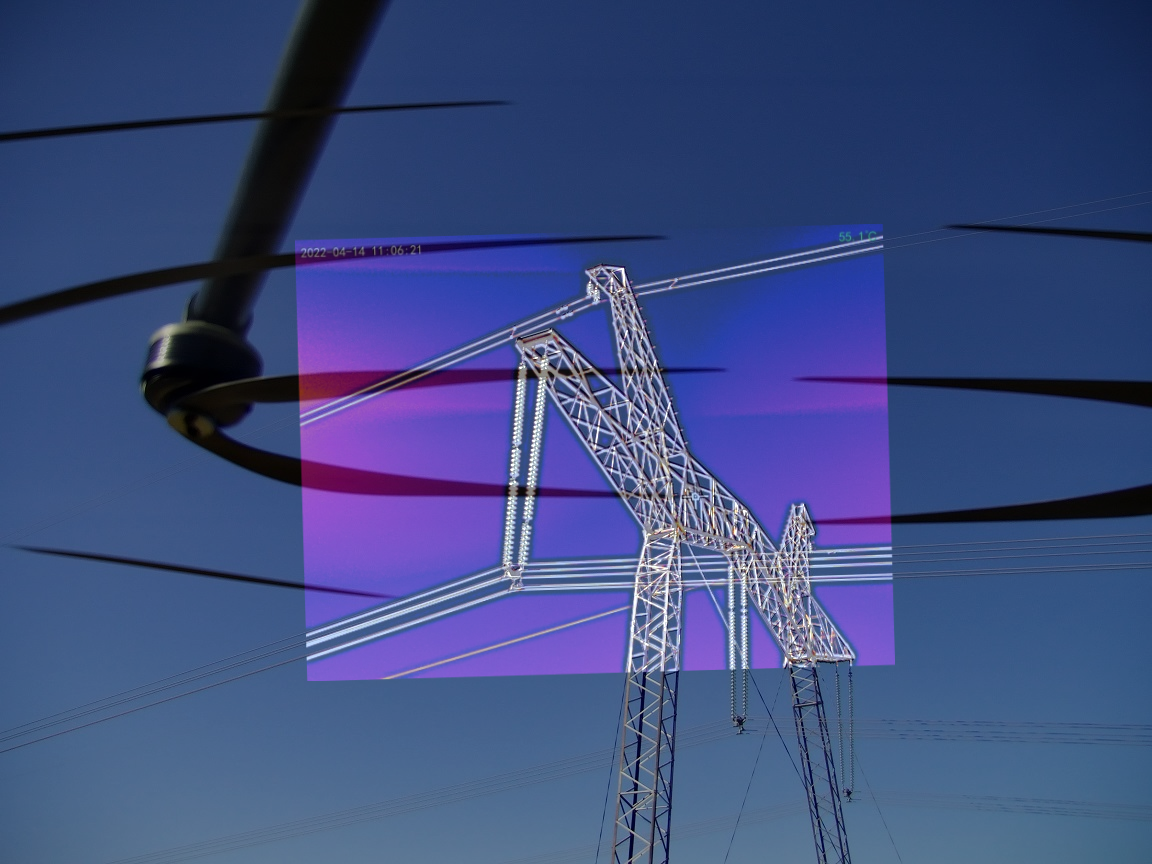

In [ ]:
blended_img = cv.addWeighted(rgb_img, 0.7, img_translation, 0.5, 0.0);
cv.imwrite('mix_image.jpg', blended_img)
cv2_imshow(blended_img);